# Project: Wrangling and Analyzing the Rate Dogs Data

## Table Of Contents
<ul>
<li><a href="#PROJECT_OVERVIEW">1.0 Project Overview</a></li>
<li><a href="#DATA_GATHERING">2.0 Data Gathering</a></li>
<li><a href="#ASSESSING_DATA">3.0 Assessing Data</a></li>
<li><a href="#DATA_QUALITY_TIDINESS">4.0 Data Quality and Tidy Issues
<li><a href="#QUALITY_ISSUES">4.1.0 Data Quality Issues</a></li>   
<li><a href="#TIDY_ISSUES">4.2.0 Tidy Issues</a></li>
<li><a href="#CLEANING_DATA">5.0 Cleaning Data</a></li>
<li><a href="#COPY_DATA">5.1.0 Copy Data</a></li>
<li><a href="#CQUALITY_ISSUES">5.2.0 Data Cleaning: Quality Issues</a></li>  
<li><a href="#CTIDY_ISSUES">5.3.0 Data Cleaning: Tidiness Issues</a></li>
<li><a href="#STORING_DATA">6.0 Storing Data</a></li>
<li><a href="#VISUALIZATION_INSIGHTS">7.0 Aalyzing and Visualizing Data</a></li>
</ul>
 

<a id='PROJECT_OVERVIEW'></a>
## 1.0 Project Overview

This project entails dataset that involves rating of people's dogs via WeRateDogs twitter account. The aim of the project is to wrangle (analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.  These ratings almost always have a denominator of 10. The numerators, on the other hand, almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."

The data provided are in three sets that will be loaded in this notebook differently. The first dataset will be gathered using the read_csv, the second one will be gathered using the get request and the third will be scrapped from twitter using teepy library.

The next step will be assessing the data to identify data quality and tidiness issues for cleaning. After Cleaning, we'll save the data in a new csv and the perform visualization and make insights thereof.

<a id='DATA_GATHERING'></a>
## 2.0 Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

### 2.1 Import Relevant Libraries and Load Data

In [1]:
# import relevant libraries
import pandas as pd
import json


### 2.2 Loading Data

### <font color='blue'>2.2.1. Loading the First DataSet (twitter_archive_enhanced.csv).</font>

In [2]:
# Load data
#col_names = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp']
df = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
# Preview the data
#df_ = pd.DataFrame(df)
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### <font color='blue'>2.2.2 Loading The Second DataSet (image_predictions.tsv) using get request.</font>

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# import the request library
import requests

In [5]:
# Loading the image predictions data using get request

#image-predictions.tsv = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
r.status_code # Response [200]
r.headers['content-type'] # 'text/tab-separated-values; charset=utf-8'
r.encoding #'utf-8'
r.text
#'{"authenticated": true, ...'
r.json
#{'authenticated': True, ...}
df_2 = r.content.decode('utf-8').split('\t')

#type(df_2)
df_2

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog\n666020888022790149',
 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
 '1',
 'Welsh_springer_spaniel',
 '0.465074',
 'True',
 'collie',
 '0.156665',
 'True',
 'Shetland_sheepdog',
 '0.0614285',
 'True\n666029285002620928',
 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg',
 '1',
 'redbone',
 '0.506826',
 'True',
 'miniature_pinscher',
 '0.07419169999999999',
 'True',
 'Rhodesian_ridgeback',
 '0.07201',
 'True\n666033412701032449',
 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg',
 '1',
 'German_shepherd',
 '0.596461',
 'True',
 'malinois',
 '0.13858399999999998',
 'True',
 'bloodhound',
 '0.11619700000000001',
 'True\n666044226329800704',
 'https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg',
 '1',
 'Rhodesian_ridgeback',
 '0.408143',
 'True',
 'redbone',
 '0.360687',
 'True',
 'miniature_pinscher',
 '0.222752',
 'True\n666049248165822465',
 'https://pbs.twim

**Observations**
> After loading the image predictions file using the get request, the content was returned as a text. In order to read the file from a String into pandas DataFrame, I'll first need to convert the string into StringIO. So, I'll import StringIO from the io library before use. Therefore, I'll import io and the StringIO will have been imported already. 

### 2.2.2.1 Importing the IO

In [6]:
# Using io to read the images to pandas data frame
import io

# Assing the content read above to a variable name data
data = r.content

# Convert the data to a pandas dataframe using StingIO
predictions_df = pd.read_csv(io.StringIO(data.decode('utf-8')), sep='\t')
predictions_df.head() # Preview the first five rows 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Preview the last five rows
predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [8]:
# Randomly preview the data
predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1927,857989990357356544,https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg,1,French_bulldog,0.432580,True,English_springer,0.325898,True,Lakeland_terrier,0.042618,True
1710,818259473185828864,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,1,miniature_schnauzer,0.367368,True,toy_poodle,0.112479,True,standard_schnauzer,0.095434,True
901,700002074055016451,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1,Chihuahua,0.369488,True,schipperke,0.243367,True,pug,0.161614,True
659,682393905736888321,https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg,1,vizsla,0.657275,True,paddle,0.090286,False,Rhodesian_ridgeback,0.048228,True
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
639,681297372102656000,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,1,Lhasa,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True
114,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador_retriever,0.209051,True,hog,0.203980,False,Newfoundland,0.165914,True
1602,800018252395122689,https://pbs.twimg.com/ext_tw_video_thumb/80001...,1,vacuum,0.289485,False,punching_bag,0.243297,False,barbell,0.143630,False
787,690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False
1799,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True


In [9]:
predictions_df.shape

(2075, 12)

In [10]:
# Preview the columns
predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [11]:
predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [12]:
#predictions_df[predictions_df['p1_dog']== False].count()
#predictions_df.query('p1_dog == False').count()

# Create a function for non dogs
def not_dogs(column_name):
    return predictions_df[predictions_df[column_name]== False].count()
    

In [13]:
not_dogs('p1_dog')

tweet_id    543
jpg_url     543
img_num     543
p1          543
p1_conf     543
p1_dog      543
p2          543
p2_conf     543
p2_dog      543
p3          543
p3_conf     543
p3_dog      543
dtype: int64

In [14]:
for i, key in enumerate(not_dogs('p1_dog').items()):
    print(key)

('tweet_id', 543)
('jpg_url', 543)
('img_num', 543)
('p1', 543)
('p1_conf', 543)
('p1_dog', 543)
('p2', 543)
('p2_conf', 543)
('p2_dog', 543)
('p3', 543)
('p3_conf', 543)
('p3_dog', 543)


In [15]:
# df = predictions_df.copy() for index, tuple in enumerate(list_of_tuples):
for i, key in enumerate(not_dogs('p1_dog').items()):
    element_one = key[0]
    element_two = key[1]
    print(element_one, element_two)
    

tweet_id 543
jpg_url 543
img_num 543
p1 543
p1_conf 543
p1_dog 543
p2 543
p2_conf 543
p2_dog 543
p3 543
p3_conf 543
p3_dog 543


In [16]:
type(not_dogs('p1_dog'))

pandas.core.series.Series

In [17]:
predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### <font color='blue'>2.2.3. Loading The Third DataSet (tweet_json.txt)</font>

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### 2.2.3.1 Option 1: Querying Twitter Using Tweepy

In [18]:
# Import the relevant libraries for querying Data from Twitter API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [19]:
# Querying Twitter API
# Use the keys obtained from the Developers Account in Twitter
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

twitter_api = tweepy.API(auth, wait_on_rate_limit=True)
twitter_api


In [20]:
tweet_ids = df['tweet_id'].values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as tweets_file_new:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = twitter_api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, tweets_file_new)
            tweets_file_new.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
#    return scrapped_tweets
end = timer()
print(f'The total time taken to scrap data from twitter was: {end - start} ')
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

KeyboardInterrupt: 

#### 2.2.3.2 Option 2: Load Directly Using the Tweet-json.txt File Provided

In [19]:
# Loading the third dataset
# Create an empty list for storing the loaded data
# The list will be converted to pandas dataframe
df_list = []
with open ('tweet-json.txt', 'r') as tweetsfile:
    for line in tweetsfile:
        tweet = json.loads(line)
        df_list.append(tweet)
tweets_df_3 = pd.DataFrame(df_list)
tweets_df_3.shape

(2354, 31)

In [20]:
tweets_df_3.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [21]:
# create a class for color
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'


In [22]:
import colorama
from colorama import Fore
# Check for the column names
column_names = tweets_df_3.columns
print(color.BOLD + f'The column names for the tweet_json.txt file are as listed below:\n\n {column_names}')

The column names for the tweet_json.txt file are as listed below:

 Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')


In [23]:
# Check for data types, missing data
tweets_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [24]:
# Check the size of the dataframe
tweets_df_3.shape

(2354, 31)

**Considering that we needed to have tweet ID, retweet count, and favorite count columns at minimum, and that there are other columns wont be utilized at the moment, I'll load the df_3 with the aforementioned columns only.**

In [25]:
import json
# Create an empty list for loading the tweets data
tweets_list = []

# Create a function for loading the third dataframe
def load_tweets_data():
    with open('tweet-json.txt', 'r') as tweetsfile: 
        for tweet in tweetsfile:
            data = json.loads(tweet)
            tweets_list.append(data)
            dataframe = pd.DataFrame(tweets_list, columns=['id', 'favorite_count', 'retweet_count'])
    return dataframe

In [26]:
# Assign the dataframe to a variable df_3 using the function load_tweets_data
df_3 = load_tweets_data().copy(deep=True)

In [27]:
# Call the function to print the dataframe
df_3.shape

(2354, 3)

One can access specific tweets by their id with the statuses/show/:id API route. Most Python Twitter libraries follow the exact same patterns, or offer 'friendly' names for the methods.

For example, Twython offers several show_* methods, including Twython.show_status() that lets you load specific tweets.

Using time.time() to measure the elapsed wall-clock time between two points:

In [28]:
# Check for the data types, missing values
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<a id='ASSESSING_DATA'></a>
## 3.0 Assessing Data
In this section, the main aim is to **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** I'll pay attention to the following key points when you access the data.

* I'll only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* I'll at least identify 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

### <font color='blue'>3.1. Assessing the First Dataset (twitter_archive_enhanced.csv)
> This file was loaded as df. I'll assess it visually and progmatically to identify any quality and tidiness issues avaliable.

In [29]:
# Previewing the data for the twitter_archive_enhanced.csv
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [30]:
# Preview the last five rows
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [31]:
# Preview the dataframe using .sample()
df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1694,681281657291280384,NaN,NaN,2015-12-28 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sarge. His parents signed him up for danc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681281657...,11,10,Sarge,None,None,None,None
539,806576416489959424,NaN,NaN,2016-12-07 19:09:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman catch successful. Massive hit by dog. F...,NaN,NaN,NaN,https://twitter.com/deadspin/status/8065709331...,13,10,None,None,None,None,None
1826,676440007570247681,NaN,NaN,2015-12-14 16:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007...,11,10,None,None,None,None,None


**Check if there are any missing values, wrong data types, wrong naming of columns by use of info().** 

In [32]:
# Use info to check for data quality issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [33]:
# Preview the column names
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Observation**
> From the above output, it's noted that the dataframe has 2356 entries and and 4 columns. The column names are well written. There are only 78 entries that have values in the in_reply_to_status_id and in_reply_to_user_id columns. Most of the data is missing for the two listed columns.

> It's also indicated that in_reply_to_status_id and in_reply_to_user_id columns have float as the data type. I'll check if this is the case pragmatically.

In [34]:
# Check for the unique values in in_reply_to_status_id and in_reply_to_user_id
# Create a function for checking unique values
def unique_values(specify_df, column_name):
    return specify_df[column_name].unique()
    

In [35]:
# Use the function to find the unique values of in_reply_to_status_id and in_reply_to_user_id columns
list_1 = ['in_reply_to_status_id', 'in_reply_to_user_id']
for name in list_1:
    print(f'The unique value in {name} are:\n\n {unique_values(df, name)}\n')

The unique value in in_reply_to_status_id are:

 [             nan   8.86266357e+17   8.81607037e+17   8.79553827e+17
   8.70726203e+17   8.63425646e+17   6.67152164e+17   8.57156678e+17
   8.55818117e+17   8.56286004e+17   8.55861584e+17   8.55858536e+17
   8.50328819e+17   8.48212112e+17   8.47606176e+17   7.59099524e+17
   8.40698300e+17   8.38145499e+17   8.38085539e+17   8.35245984e+17
   8.32087548e+17   8.31903044e+17   8.26598365e+17   8.23326389e+17
   8.21152593e+17   8.13127252e+17   8.11627233e+17   7.33109485e+17
   8.01854331e+17   8.00857954e+17   7.97123751e+17   7.72743019e+17
   7.66711819e+17   7.63865175e+17   7.50180499e+17   7.47648654e+17
   7.46885919e+17   6.91416866e+17   7.38411920e+17   7.29113531e+17
   7.07980066e+17   7.03255936e+17   7.04485745e+17   7.03041950e+17
   6.96488711e+17   6.75349384e+17   6.70668383e+17   6.93642232e+17
   6.93572216e+17   6.92417313e+17   6.92041935e+17   6.90341254e+17
   6.86034025e+17   6.85547936e+17   6.84959799e+17   

**Observation**
>The in_reply_to_status_id and in_reply_to_user_id columns had the values in exponential format thus difficult to know the exact values in the stated columns.

### <font color='blue'>3.2. Assesing the Second DataSet (image_predictions.tsv)
> This dataset was loaded as predictions_df. I'll perform assessment both visually and progmatically. To do so, I'll first preview it.

In [36]:
# preview the predictions dataframe
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
# Preview the last five rows
predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


**Column Definitions for the Predictions Dataframe**
The definitions for the above dataframe are as listed below:
>* tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
>* p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
>* p1_conf is how confident the algorithm is in its #1 prediction → 95%
>* p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
>* p2 is the algorithm's second most likely prediction → Labrador retriever
>* p2_conf is how confident the algorithm is in its #2 prediction → 1%
>* p2_dog is whether or not the #2 prediction is a breed of dog → TRUE etc

In [38]:
# Check the data type, missing values and the naming of columns
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
# Check for unique values in img_num column
predictions_df['img_num'].unique()

array([1, 4, 2, 3])

In [40]:
# check for unique values in p1, p2 and p3
list_2 = ['p1', 'p2', 'p3']
for names_2 in list_2:
    print(f'The unique values for {names_2} are:\n\n {unique_values(predictions_df, names_2)}\n')

The unique values for p1 are:

 ['Welsh_springer_spaniel' 'redbone' 'German_shepherd' 'Rhodesian_ridgeback'
 'miniature_pinscher' 'Bernese_mountain_dog' 'box_turtle' 'chow'
 'shopping_cart' 'miniature_poodle' 'golden_retriever' 'Gordon_setter'
 'Walker_hound' 'pug' 'bloodhound' 'Lhasa' 'English_setter' 'hen'
 'desktop_computer' 'Italian_greyhound' 'Maltese_dog' 'three-toed_sloth'
 'ox' 'malamute' 'guinea_pig' 'soft-coated_wheaten_terrier' 'Chihuahua'
 'black-and-tan_coonhound' 'coho' 'toy_terrier' 'Blenheim_spaniel'
 'Pembroke' 'llama' 'Chesapeake_Bay_retriever' 'curly-coated_retriever'
 'dalmatian' 'Ibizan_hound' 'Border_collie' 'Labrador_retriever'
 'seat_belt' 'snail' 'miniature_schnauzer' 'Airedale' 'triceratops' 'swab'
 'hay' 'hyena' 'jigsaw_puzzle' 'West_Highland_white_terrier' 'toy_poodle'
 'giant_schnauzer' 'vizsla' 'vacuum' 'Rottweiler' 'Siberian_husky' 'teddy'
 'papillon' 'Saint_Bernard' 'porcupine' 'goose' 'Tibetan_terrier' 'borzoi'
 'beagle' 'hare' 'Yorkshire_terrier' 'Pome

**Observation**
>From the above output. there are 2075 entries and 12 columns. The info method indicates that there are no missing values and that the data types are in the right format. However, the naming of the unique values in p1, p2 and p3 are not consitent. Some have underscores, hyphen, others are written in small letters while some start with upper cases.

> There are names listed as dogs but they aren't dog breeds such as wooden_spoon, pencil_box, envelope, coffee_mug etc in p1

In [41]:
# Confirm there are names written on the dogs breeds that are not breeds of dogs
for i in predictions_df['p2']:
    if i == 'water_bottle':
        print(f'Yes. There is {i} in the predictions df.')

Yes. There is water_bottle in the predictions df.


### <font color='blue'>3.3 Assessing the Third DataSet (tweet-json.txt)
This dataset was loaded as df_3.

In [42]:
# Preview the first five rows of the third dataframe
df_3.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [43]:
# Preview the last five rows of the third dataframe
df_3.tail()

,id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


**Observation**
>There are missing values from the displayed last five rows. I'll use the info() to check for further issues.

In [44]:
# Check for data types, naming of columns, size of the dataframe
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**Observation**
>The tweet_json.txt file was loaded as df_3. The info() indicates there are no null values. The data types are in the right formats.

<a id='DATA_QUALITY_TIDINESS'></a>
## 4.0 Data Quality and Tidiness Issues

<a id='QUALITY_ISSUES'></a>
### 4.1.0 Quality Issues
>1. Columns in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archived_enhanced.csv have lots of missing data.

>2. in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archived_enhanced.csv (df) had the values in exponential.

>3. The timestamp column in twitter_archived_enhanced.csv (df) was in object instead of datetime format.

>4. The names of dog breeds in the predictions df are not consistent. Some names have underscores, hypen, upper case

>5. From the visual assessment, the rating denominator should be 10 but there are values i.e 0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2 .

>6. Some columns in the df dataframe are not necessary such as the name, expanded urls, text, source among others. It represents the name od the dogs and not the breed of the dog.

>7. The naming of the columns in predictions_df are not discrete i.e img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog. It is difficult for one to understand what the columns represent

>8. Some names listed as breeds of dogs are not correct. Example is wooden spoon, pencil box, envelope, entertainment centre, lifeboat, coackroach, crate, water_bottle among others.

<a id='TIDY_ISSUES'></a>
### 4.2.0 Tidy Issues
>1. In the third dataframe (df_3) the breeds of dog p1, p2 and p3 should be in one column where it captures the breed with the highest confidence level. This column could be referred to type of breed.

>2. The tweet id are in dataframe one and two while in the third dataframe, it is referred to as id. This should be merged to one dataframe so that there's only one tweet id.

>3. The dog stages in the first dataframe (df) are captured in separate columns. This should be in one column called dog_stages with the details of the stages of the dog i.e. doggo, floofer, pupper, and puppo. More infomation is found via the (#WeRateDogs book)(https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145) on Amazon.

<a id='CLEANING_DATA'></a>
## 5.0 Cleaning Data
In this section, I'll clean **all** of the issues you documented while assessing. 

**Note:** Before cleaning the dataframes, I'll make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

<a id='COPY_DATA'></a>
### 5.1.0 Copy Data

> Before perfoming any cleaning, I'll make copies of the dataframes.

In [45]:
# Make copies of original pieces of data
# make a copy of the first dataset twitter_archived_enhanced.csv(df)
df_1_copy = df.copy(deep=True)

# Make a copy of the second dataset image_predictions.tsv (predictions_df)
df_2_copy = predictions_df.copy(deep=True)

# make a copy of the tweet-json.txt (df_3)
df_3_copy = df_3.copy(deep=True)

<a id='CQUALITY_ISSUES'></a>
### 5.2.0 Data Cleaning: Quality Issues

### <font color='blue'>Issue #1: 
><font color='blue'>**Columns in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archived_enhanced.csv have lots of missing data.**

#### Define:
>Drop these columns using the drop function.

#### Code

In [46]:
# Preview the data has been copied
df_1_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [47]:
# Preview all the columns to get the correct column names
df_1_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [48]:
# Drop the in_reply_to_status_id and in_reply_to_user_id columns 
# together with other columns that won't be used in analysis
# assign the columns to be dropped to a variable
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source',
                'text', 'expanded_urls']
df_1_copy.drop(drop_columns, inplace=True, axis=1)

#### Test

In [49]:
# Preview the column names to confirm the columns are dropped
df_1_copy.columns

Index(['tweet_id', 'timestamp', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### <font color='blue'>Issue #2:
><font color='blue'>**a. in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archived_enhanced.csv (df) had the values in exponential.**

#### Define
> These columns have been dropped otherwise to remove exponential in python, I would have used the lambda function to supress the scientific notation. I'll make a copy of the origainal dataframe and perform this step.

#### Code

In [50]:
# make a copy of the original dataframe
copy_copy_df = df.copy(deep=True)
copy_copy_df['in_reply_to_status_id'] = copy_copy_df['in_reply_to_status_id'].apply(lambda x: '%.5f' % x)

#### Test

In [51]:
# Preview to see the changes have been effected
copy_copy_df['in_reply_to_status_id'][1452]

'675349384339542016.00000'

><font color='blue'>**b. Rename the column names ('doggo', 'floofer', 'pupper', 'puppo') in twitter_archived_enhanced.csv.**

**Code**

In [52]:
# Rename the column names of the dog stages
df_1_copy.rename(columns = {'floofer' : 'floofer_stage',
                           'doggo' : 'doggo_stage',
                           'pupper': 'pupper_stage',
                           'puppo': 'puppo_stage'}, inplace=True)
#df_1_copy.head(3)

**Test**

In [53]:
# Preview the column names to confirm if columns have been renamed
df_1_copy.columns

Index(['tweet_id', 'timestamp', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'rating_denominator', 'name', 'doggo_stage',
       'floofer_stage', 'pupper_stage', 'puppo_stage'],
      dtype='object')

### <font color='blue'>Issue #3:
><font color='blue'>**The timestamp column in twitter_archived_enhanced.csv (df) was in object instead of datetime format.**

**Define**
>Change the timestamp column from object to datetime datatype using to_datetime method.

**Code**

In [54]:
# Convert the timestamp datatype to datetime
df_1_copy["timestamp"]= pd.to_datetime(df_1_copy["timestamp"])

**Test**

In [55]:
# Confirm if the changes have been effected
df_1_copy['timestamp'].dtypes

dtype('<M8[ns]')

In [56]:
# Check the data types
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo_stage                   2356 non-null object
floofer_stage                 2356 non-null object
pupper_stage                  2356 non-null object
puppo_stage                   2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 221.0+ KB


### <font color='blue'>Issue #4:
><font color='blue'>**The names of dog breeds in the predictions df are not consistent. Some names have underscores, hypen, upper case.**

**Define**
>Remove the hyphens, underscores and upper case using str.lower() and .replace() in columns p1, p2 and p3. 

**Code**

In [57]:
# Preview the predictions dataframe
df_2_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Note:**
>Considering that python is case sensitive, I'll lower all the dog breeds in columns p1, p2 and p3 and thereafter remove the underscores and hyphens and replace them with white/empty spaces.

In [58]:
# Put all the dog breeds to lower cases
# Remove underscores and hyphen in columns p1, p2 and p3
cols = ['p1', 'p2', 'p3']
for col in cols:
    df_2_copy[col] = df_2_copy[col].map(lambda col: str(col).replace('_',' ').lower())
    # Alternative code
    # df_2_copy[col] = df_2_copy[col].str.replace('[-,_]',' ').str.lower()

**Test**

In [59]:
# Preview if the changes have been effected
df_2_copy.iloc[:,3:12:3].head()

,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman


**Observation:**
> From the above output, it evident that the dog breeds are in lower case and that the underscores and hyphens have been removed.

### <font color='blue'>Issue #5:
><font color='blue'>**From the visual assessment, the rating denominator should be 10 but there are values i.e 0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2 .**

**Define**
>Drop the rating denominator column using .drop(). This column isn't of much use during the analysis.

**Code**

In [60]:
# Drop the rating denominator column from the df_1_copy dataframe
df_1_copy.drop(columns = ['rating_denominator'], axis=1, inplace=True)

**Test**

In [61]:
# Confirm if the rating denominator column has been dropped
df_1_copy.columns

Index(['tweet_id', 'timestamp', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'name', 'doggo_stage', 'floofer_stage',
       'pupper_stage', 'puppo_stage'],
      dtype='object')

### <font color='blue'>Issue #6:
><font color='blue'>**Some columns in the first dataframe (df_1_copy) are not necessary such as the name, expanded urls, text, source among others. It represents the name of the dogs and not the breed of the dog.**

**Define**
>Use the drop function to remove columns that won't be used during analysis

**Code**

In [62]:
# Preview the columns to get the right column names
df_1_copy.columns

Index(['tweet_id', 'timestamp', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'name', 'doggo_stage', 'floofer_stage',
       'pupper_stage', 'puppo_stage'],
      dtype='object')

In [63]:
# Drop the name columns
df_1_copy.drop(columns=['name'], axis=1, inplace=True)

**Test**

In [64]:
# Preview the column names to check if timestamp and name have been dropped.
df_1_copy.columns

Index(['tweet_id', 'timestamp', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'doggo_stage', 'floofer_stage', 'pupper_stage',
       'puppo_stage'],
      dtype='object')

### <font color='blue'>Issue #7:
><font color='blue'> **The naming of the columns in predictions_df are not discrete i.e img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog. It is difficult for one to understand what the columns represent.**   

**Define**
>Rename the columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog to prediction_1, prediction_1_confidence, prediction_1_status,prediction_2, prediction_2_confidence, prediction_2_status, prediction_3, prediction_3_confidence, prediction_3_status 

**Code**

In [65]:
# Rename p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog
df_2_copy.rename(columns = {'p1': 'prediction_1',
                            'p1_conf': 'prediction_1_confidence',
                            'p1_dog': 'prediction_status',
                            'p2': 'prediction_2',
                            'p2_conf': 'prediction_2_confidence',
                            'p2_dog': 'prediction_2_status',
                            'p3':'prediction_3',
                            'p3_conf': 'prediction_3_confidence',
                            'p3_dog': 'prediction_3_status'}, inplace=True)

**Test**

In [66]:
# Preview the column names to check if the changes have been effected.
df_2_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'prediction_1_confidence', 'prediction_status', 'prediction_2',
       'prediction_2_confidence', 'prediction_2_status', 'prediction_3',
       'prediction_3_confidence', 'prediction_3_status'],
      dtype='object')

<a id='CTIDY_ISSUES'></a>
### 5.3.0 Data Cleaning: Tidiness Issues

### <font color='blue'>Issue #8:
><font color='blue'>**Some names listed as breeds of dogs are not correct. Example is wooden spoon, pencil box, envelope, entertainment centre, lifeboat, coackroach, crate, water_bottle among others.**

**Define**
>* Having the three confidence level on the predictions, I'll drop the second and third confidence because the first confidence (prediction confidence) with a level of 95% is more reliable amongst the three cofidence levels. Therefore, I'll drop prediction_2, prediction_2_confidence, prediction_2_status, prediction_3, prediction_3_confidence, prediction_3_status and max_confidence. But before then, I'll create a new column (max_confidence) that captures the highest confidence level in every entry.

>* Bearing in mind that the project focuses on dogs, the next thing will be to drop the false on prediction_1_status as they are not dogs. 

**Code**

In [67]:
# Create a new column to capture highest confidence values
df_2_copy['max_confidence'] = df_2_copy[['prediction_1_confidence', 'prediction_2_confidence', 'prediction_1_confidence']].max(axis=1)
df_2_copy.head(3)

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_status,prediction_2,prediction_2_confidence,prediction_2_status,prediction_3,prediction_3_confidence,prediction_3_status,max_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461


**Note:**
>Check if all the values in the max_confidence column belong to prediction_1_confidence as this is the predictions with 95% confidence amongst the other two confidence level (p2 and p3).

#### Check if all the values in the max_confidence column belong to prediction_1_confidence.
>**Option 1**

In [68]:
# Check if all the values in the max_confidence column belong to prediction_1_confidence
for value in df_2_copy['max_confidence']:
    if value not in df_2_copy['prediction_1_confidence']:
        df_2_copy[value] == df_2_copy[value]

**Observation**
> From the above output, it's evident that all the values in max_confidence column, are from the prediction_1_confidence. To prove this further, I'll check for the shape of these true values.

#### Check if all the values in the max_confidence column belong to prediction_1_confidence.
>**Option 2**

In [69]:
# Use .shape to check for the size of true values in 
# max_confidence column all come from prediction_1_confidence
df_2_copy[~df_2_copy['max_confidence'].isin(['prediction_1_confidence'])].shape 

(2075, 13)

#### Check if all the values in the max_confidence column belong to prediction_1_confidence.
>**Option 3**

In [70]:
# Check if all the values in the max_confidence column belong to prediction_1_confidence
# Define a function that either prints values not in prediction_1_confidence
# or returns the shape of the dataframe if all values in max_confidence column
# are in the prediction_1_confidence column
def confidence_shape(data, column_1, column_2): # data = df_2_copy
    for value in data[column_1]: # 'max_confidence'
        if value not in data[column_2]: # 'prediction_1_confidence'
            data[value] == data[value]
            print(value)
        else:
            return data.shape

In [71]:
# Use the function above to confirm the shape of the data with true values
confidence_shape(df_2_copy, 'max_confidence', 'prediction_1_confidence')

(2075, 13)

**Observation**
> From the above output, it is evident that the highest predictions were captured in prediction_1. Therfore, I'll drop the details for Prediction_2 and prediction_3 which are prediction_2, prediction_2_confidence, prediction_2_status, prediction_3', prediction_3_confidence, prediction_3_status and max_confidence.

In [72]:
# Drop values in prediction 2 and prediction 3
# Create a list of all the values to be dropped
coll_names = ['prediction_2', 'prediction_2_confidence', 'prediction_2_status', 'prediction_3',
               'prediction_3_confidence', 'prediction_3_status', 'max_confidence']

# Use the created list to drop the values
df_2_copy.drop(columns=coll_names, inplace=True, axis=1)

In [73]:
# Preview the columns to confirm if the changes are effected
df_2_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'prediction_1_confidence', 'prediction_status'],
      dtype='object')

**Observation**
> The changes have been effected. I'll therefore check the false values in prediction_1_status and drop them also because we only need to retain the dogs only.

In [74]:
# Use value count to check for the number of True and False dog predictions
df_2_copy.prediction_status.value_counts()

True     1532
False     543
Name: prediction_status, dtype: int64

In [75]:
# Find the false prediction of dogs
false_prediction = df_2_copy.query('prediction_status == False')
false_prediction

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_status
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop computer,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed sloth,0.914671,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea pig,0.996496,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat belt,0.375057,False


**Observation**
> Looking at the prediction confidence level, despite the fact that some had high confidence of i.e 0.949591, the result obtained was web site and the prediction status was false. Therefore, dropping this entries is viable because the predictions are not dogs.

In [76]:
# Drop the false predictions
df_2_copy.drop(false_prediction.index,  inplace=True)

**Test**

In [77]:
# Check the shape of the original dataframe before dropping the false predictions
predictions_df.shape

(2075, 12)

In [78]:
# Shape for the dataframe after dropping false predictions
df_2_copy.shape

(1532, 6)

In [79]:
# Check for the number of rows dropped
predictions_df.shape[0] - df_2_copy.shape[0]

543

**Observation**
> If we recall, we had earlier created a dataframe for all the values that had false predictions and the shape was 543 as previwed below:

In [80]:
# Use the original dataframe to check for the false prediction as the copy 
# of the prediction will return 0 rows because they have been dropped already
false_prediction_ = predictions_df.query('p1_dog == False')
false_prediction_.shape

(543, 12)

**Observation**
>From the output of this code 
```
predictions_df.shape[0] - df_2_copy.shape[0]
```, 
which was 543, it is evident that all the rows with false on the dog prediction status were dropped so that we concetrate on dogs only during the analysis.

**Note**
> Previewing the names of dog breeds remaining to see if there's any that is not a breed of a dog.

In [81]:
# Use .unique to preview the dog breeds name
dog_breeds_names = df_2_copy['prediction_1'].unique()
print(f'The names of the remaining dog breeds are:\n\n {dog_breeds_names}')

The names of the remaining dog breeds are:

 ['welsh springer spaniel' 'redbone' 'german shepherd' 'rhodesian ridgeback'
 'miniature pinscher' 'bernese mountain dog' 'chow' 'miniature poodle'
 'golden retriever' 'gordon setter' 'walker hound' 'pug' 'bloodhound'
 'lhasa' 'english setter' 'italian greyhound' 'maltese dog' 'malamute'
 'soft-coated wheaten terrier' 'chihuahua' 'black-and-tan coonhound'
 'toy terrier' 'blenheim spaniel' 'pembroke' 'chesapeake bay retriever'
 'curly-coated retriever' 'dalmatian' 'ibizan hound' 'border collie'
 'labrador retriever' 'miniature schnauzer' 'airedale'
 'west highland white terrier' 'toy poodle' 'giant schnauzer' 'vizsla'
 'rottweiler' 'siberian husky' 'papillon' 'saint bernard' 'tibetan terrier'
 'borzoi' 'beagle' 'yorkshire terrier' 'pomeranian' 'kuvasz'
 'flat-coated retriever' 'norwegian elkhound' 'standard poodle'
 'staffordshire bullterrier' 'basenji' 'lakeland terrier'
 'american staffordshire terrier' 'shih-tzu' 'french bulldog' 'pekinese'

In [82]:
len(dog_breeds_names)

111

**Observation**
>From the above output, there seem to be no name that is not a dog breed.

### <font color='blue'>Issue #9:
><font color='blue'>**In the second dataframe (prediction_df) the breeds of dog p1, p2 and p3 should be in one column where it captures the breed with the highest confidence level. This column should capture the type of dogs breed.**

**Define**
> This issue has been solved in issue #8. 

**Code**

In [83]:
# Preview the dataframe df_2_copy 
df_2_copy.head()

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True


**Notes**
>Considering that the prediction column has all true values, I'll drop this column.

In [84]:
# Drop the prediction status column
df_2_copy.drop(columns=['prediction_status'], axis=1, inplace=True)

**Test**

In [85]:
# Preview the dataframe
df_2_copy.head()

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311


**Observation**
>The prediction status column has been dropped. 

### <font color='blue'>Issue #10:
><font color='blue'>**The dog stages in the first dataframe (df) are captured in separate columns. This should be in one column called dog_stages with the details of the stages of the dog i.e. doggo, floofer, pupper, and puppo.**

**Define**
> Use the melt() to put the dog stages in one column.

**Note**
> Check for the count of the unique values in the four columns to ensure that the right values are obtained after melting the respective columns. To perform this step, I'll create a function for value count.

>Then to condense the four columns doggo, floofer, pupper and puppo into one column, I'll first replace the None with 'missing' then use the 
```
melt()
```to have four dog stages in one column called dog_stages. Not replacing the None will make the empty spaces have dog stages values.



**Code**

In [86]:
# Preview the dataframe
df_1_copy.head(2)

,tweet_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,doggo_stage,floofer_stage,pupper_stage,puppo_stage
0,892420643555336193,2017-08-01 16:23:56,NaN,NaN,NaN,13,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,NaN,NaN,NaN,13,None,None,None,None


In [87]:
# Use info to preview the details in the dataframe
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
doggo_stage                   2356 non-null object
floofer_stage                 2356 non-null object
pupper_stage                  2356 non-null object
puppo_stage                   2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 184.1+ KB


In [88]:
# Check for missing values 
df_1_copy.isna().sum()

tweet_id                         0
timestamp                        0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
rating_numerator                 0
doggo_stage                      0
floofer_stage                    0
pupper_stage                     0
puppo_stage                      0
dtype: int64

**Obseravtion**
>From the above out, it indicates that there are no null values yet a visual assessment of the data showed None values. Therefore, I'll replace the None with the word missing. But first, I'll create a function for value count that will return the number of unique values in floofer, doggo,pupper and poppo columns.

In [89]:
# Create a function using the defined list_2 
# that return the unique values in the list
def value_count_(df_name):
    for col_name in df_1_copy.iloc[:, 6:10]:
        nn_value = df_name[col_name].value_counts()
        print(f'The unique values in {nn_value.index[1].title()} are:\n {nn_value} \n')
        #print('\n', nn_value)

In [90]:
# Use the function value_count to print out the value counts
value_count_(df_1_copy)

The unique values in Doggo are:
 None     2259
doggo      97
Name: doggo_stage, dtype: int64 

The unique values in Floofer are:
 None       2346
floofer      10
Name: floofer_stage, dtype: int64 

The unique values in Pupper are:
 None      2099
pupper     257
Name: pupper_stage, dtype: int64 

The unique values in Puppo are:
 None     2326
puppo      30
Name: puppo_stage, dtype: int64 



In [91]:
# # Create a new column at index 2 that will capture nil values
# df_1_copy.insert(2, 'nil', 'nil')
# df_1_copy.head(3)

**Note**
>Next, I'll check for unique values in the four columns just to ensure there are no other unwarranted values.

In [92]:
# check for unique values in doggo, floofer, pupper and puppo
# just to confirm there are no other alternate values
# Use the function created earlier for unique values
# This was the function :unique_values(specify_df, column_name)
# Use the function to find the unique values of doggo, floofer, pupper and puppo columns
list_3 = ['doggo_stage', 'floofer_stage', 'pupper_stage', 'puppo_stage']
for names in list_3:
    print(f'The unique values in {names} are: {unique_values(df_1_copy, names)}\n')

The unique values in doggo_stage are: ['None' 'doggo']

The unique values in floofer_stage are: ['None' 'floofer']

The unique values in pupper_stage are: ['None' 'pupper']

The unique values in puppo_stage are: ['None' 'puppo']



**Observation**
> From the above output, it's evident that there are no other values other than the four dog stages and None.

**Note**
>I'll therefore create a function that will replace the all the None values with the word 'missing'.

In [93]:
stages_list = ['doggo', 'floofer', 'pupper', 'puppo']

In [94]:
# Create a function that will replace the all the None values with the word 'missing'
def fill_none(df_name):
    for k in stages_list:
        for item, value in df_name[list_3].items():
            if value is not k:
                df_name.replace(to_replace='None', value='missing', inplace=True) # np.nan
        return df_name

In [95]:
# check if the changes have been effected.
fill_none(df_1_copy)

,tweet_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,doggo_stage,floofer_stage,pupper_stage,puppo_stage
0,892420643555336193,2017-08-01 16:23:56,NaN,NaN,NaN,13,missing,missing,missing,missing
1,892177421306343426,2017-08-01 00:17:27,NaN,NaN,NaN,13,missing,missing,missing,missing
2,891815181378084864,2017-07-31 00:18:03,NaN,NaN,NaN,12,missing,missing,missing,missing
3,891689557279858688,2017-07-30 15:58:51,NaN,NaN,NaN,13,missing,missing,missing,missing
4,891327558926688256,2017-07-29 16:00:24,NaN,NaN,NaN,12,missing,missing,missing,missing
5,891087950875897856,2017-07-29 00:08:17,NaN,NaN,NaN,13,missing,missing,missing,missing
6,890971913173991426,2017-07-28 16:27:12,NaN,NaN,NaN,13,missing,missing,missing,missing
7,890729181411237888,2017-07-28 00:22:40,NaN,NaN,NaN,13,missing,missing,missing,missing
8,890609185150312448,2017-07-27 16:25:51,NaN,NaN,NaN,13,missing,missing,missing,missing
9,890240255349198849,2017-07-26 15:59:51,NaN,NaN,NaN,14,doggo,missing,missing,missing


In [96]:
# check if there are any missing values
df_1_copy.isna().sum()

tweet_id                         0
timestamp                        0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
rating_numerator                 0
doggo_stage                      0
floofer_stage                    0
pupper_stage                     0
puppo_stage                      0
dtype: int64

**Observation**
> There are no missing values. I'll therefore save the output to a dataframe.

In [97]:
# Save the above output to a dataframe
updated_df_1 = fill_none(df_1_copy).copy(deep=True)

In [98]:
# check for the shape of the dataframe to ensure is as before changes were done
updated_df_1.shape

(2356, 10)

In [99]:
updated_df_1.columns

Index(['tweet_id', 'timestamp', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'doggo_stage', 'floofer_stage', 'pupper_stage',
       'puppo_stage'],
      dtype='object')

In [100]:
# Use the melt() to save the dog stages into one column
updated_df_1 = pd.melt(updated_df_1,id_vars = ['tweet_id','timestamp', 'rating_numerator', 'retweeted_status_id',
                                               'retweeted_status_user_id', ' retweeted_status_timestamp'],
                       value_vars = ['doggo_stage', 'floofer_stage', 'pupper_stage', 'puppo_stage'],
                       var_name = 'dog_stages', value_name = 'dog_stages_type')

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


**Test**

In [101]:
# Preview the dataframe to check if the dog stages are in one column
updated_df_1.head()

,tweet_id,timestamp,rating_numerator,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_stages,dog_stages_type
0,892420643555336193,2017-08-01 16:23:56,13,NaN,NaN,NaN,doggo_stage,missing
1,892177421306343426,2017-08-01 00:17:27,13,NaN,NaN,NaN,doggo_stage,missing
2,891815181378084864,2017-07-31 00:18:03,12,NaN,NaN,NaN,doggo_stage,missing
3,891689557279858688,2017-07-30 15:58:51,13,NaN,NaN,NaN,doggo_stage,missing
4,891327558926688256,2017-07-29 16:00:24,12,NaN,NaN,NaN,doggo_stage,missing


In [102]:
# Drop the dog_stages column
updated_df_1.drop(['dog_stages'], axis=1, inplace = True)

In [103]:
# Drop the duplicates formed after melting the four columns
updated_df_1.drop_duplicates(keep='first', inplace=True )

In [104]:
# Confirm the shape of the datframe
updated_df_1.shape

(2750, 7)

In [105]:
# Check if there are any duplicates left
updated_df_1.duplicated().sum()

0

In [106]:
# Check for the unique values in the dog_stages_type column
updated_df_1['dog_stages_type'].unique()

array(['missing', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [107]:
# Check the values counts for the dog_stages_type
updated_df_1['dog_stages_type'].value_counts()

missing    2356
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stages_type, dtype: int64

**Note**
>Compare the value count of dog stages after performing melting with the value counts befor melting the four columns.

In [108]:
# Create a list of the dog stages column in the original data
list_4 = df.iloc[:,13:17]
list_4.head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [109]:
# Print the value counts of the dog stages in the original data
for column in list_4:
    print(f'The value count for {column.title()} in the original data is: {df[column].value_counts()[1]}')

# Check the values counts for the dog_stages_type
print(f'While the value count for dog stages in the melted column are:')
updated_df_1['dog_stages_type'].value_counts()

The value count for Doggo in the original data is: 97
The value count for Floofer in the original data is: 10
The value count for Pupper in the original data is: 257
The value count for Puppo in the original data is: 30
While the value count for dog stages in the melted column are:


missing    2356
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stages_type, dtype: int64

**Observation**
>From the above, it is evident that the number of dog stages has been maintained.

### <font color = 'Blue'>Issue #11:
><font color = 'Blue'>**The tweet id are in dataframe one and two while in the third dataframe, it is referred to as id. This should be merged to one dataframe so that there's only one tweet id.**

**Define**
> Rename the id in the third dataframe to tweet_id then merge the three dataframe.

**Code**

In [110]:
# Preview the column names for the three dataframes 
# First dataframe column names
updated_df_1.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'retweeted_status_id',
       'retweeted_status_user_id', ' retweeted_status_timestamp',
       'dog_stages_type'],
      dtype='object')

In [111]:
# Check the shape for the first dataframe
updated_df_1.shape

(2750, 7)

In [112]:
# Preview the second dataframe column names
df_2_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'prediction_1_confidence'],
      dtype='object')

In [113]:
# Check the shape of the second dataframe
df_2_copy.shape

(1532, 5)

In [114]:
# Preview the third dataframe column names
df_3_copy.columns

Index(['id', 'favorite_count', 'retweet_count'], dtype='object')

In [115]:
# Check the shape for the third dataset
df_3_copy.shape

(2354, 3)

#### Additional Cleaning of Quality Issues
> Drop the retweet column in the third data set and all rows that had retweet data captured in the first dataset. 

In [116]:
# Drop the retweet column
df_3_copy.drop(['retweet_count'], axis=1, inplace =True)

In [117]:
# Check if the retweet column has been dropped
df_3_copy.head(2)

,id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819


In [118]:
# Rename the id in the third dataframe to tweet_id
df_3_copy.rename(columns= {'id': 'tweet_id'}, inplace=True)

# Check the columns names to confirm changes have been made
df_3_copy.columns

Index(['tweet_id', 'favorite_count'], dtype='object')

In [119]:
# Drop retweet rows in 'retweeted_status_id','retweeted_status_user_id', ' retweeted_status_timestamp'
retweets_rows = updated_df_1[updated_df_1['retweeted_status_id'].notna()]
retweets_rows

,tweet_id,timestamp,rating_numerator,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_stages_type
19,888202515573088257,2017-07-21 01:02:36,13,8.874740e+17,4.196984e+09,NaN,missing
32,886054160059072513,2017-07-15 02:45:48,12,8.860537e+17,1.960740e+07,NaN,missing
36,885311592912609280,2017-07-13 01:35:06,13,8.305833e+17,4.196984e+09,NaN,missing
68,879130579576475649,2017-06-26 00:13:58,14,8.780576e+17,4.196984e+09,NaN,missing
73,878404777348136964,2017-06-24 00:09:53,13,8.782815e+17,4.196984e+09,NaN,missing
74,878316110768087041,2017-06-23 18:17:33,11,6.690004e+17,4.196984e+09,NaN,missing
78,877611172832227328,2017-06-21 19:36:23,14,8.768508e+17,5.128045e+08,NaN,missing
91,874434818259525634,2017-06-13 01:14:41,12,8.663350e+17,4.196984e+09,NaN,missing
95,873697596434513921,2017-06-11 00:25:14,14,8.688804e+17,4.196984e+09,NaN,missing
97,873337748698140672,2017-06-10 00:35:19,12,8.732138e+17,4.196984e+09,NaN,missing


In [120]:
# Drop the rows that had retweets
updated_df_1.drop(retweets_rows.index, inplace=True)

In [121]:
# Confirm the rows with retweets have been dropped
updated_df_1[updated_df_1['retweeted_status_id'].notna()]

,tweet_id,timestamp,rating_numerator,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_stages_type


In [122]:
# Check the shape of the dataframe
updated_df_1.shape

(2531, 7)

In [123]:
# Preview the columns
updated_df_1.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'retweeted_status_id',
       'retweeted_status_user_id', ' retweeted_status_timestamp',
       'dog_stages_type'],
      dtype='object')

**Note**
>Having remained with original tweets only, I'll therefore drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns as their values are all nan.

In [124]:
# Select the columns that require dropping
col_names = updated_df_1.iloc[:, 3:6]
col_names.head()

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [125]:
# Drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
updated_df_1.drop(col_names ,axis=1, inplace=True)

In [126]:
# Confirm the columns have been dropped
updated_df_1.head(3)

,tweet_id,timestamp,rating_numerator,dog_stages_type
0,892420643555336193,2017-08-01 16:23:56,13,missing
1,892177421306343426,2017-08-01 00:17:27,13,missing
2,891815181378084864,2017-07-31 00:18:03,12,missing


In [127]:
# Shape of the third dataframe
updated_df_1.shape

(2531, 4)

### Merge the three DataFrames

In [128]:
# Merge the first and second dataset and save on clean_data variable
clean_data = pd.merge(updated_df_1, df_2_copy,  on = 'tweet_id', how = 'inner')

In [129]:
# Check the shape of the merged data above
clean_data.shape

(1715, 8)

In [130]:
# Find missing values 
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 0 to 1714
Data columns (total 8 columns):
tweet_id                   1715 non-null int64
timestamp                  1715 non-null datetime64[ns]
rating_numerator           1715 non-null int64
dog_stages_type            1715 non-null object
jpg_url                    1715 non-null object
img_num                    1715 non-null int64
prediction_1               1715 non-null object
prediction_1_confidence    1715 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 120.6+ KB


In [131]:
# Check for value counts in the img_num column
clean_data['img_num'].value_counts()

1    1447
2     184
3      54
4      30
Name: img_num, dtype: int64

In [132]:
# Value counts for dog stages in the merged data above
clean_data['dog_stages_type'].value_counts()

missing    1477
pupper      152
doggo        58
puppo        20
floofer       8
Name: dog_stages_type, dtype: int64

In [133]:
# Merge the third dataset with the merged data above
final_df = pd.merge(clean_data, df_3_copy, on = 'tweet_id', how = 'inner')
final_df.shape

(1715, 9)

In [134]:
# Preview the merged data
final_df.head(3)

,tweet_id,timestamp,rating_numerator,dog_stages_type,jpg_url,img_num,prediction_1,prediction_1_confidence,favorite_count
0,892177421306343426,2017-08-01 00:17:27,13,missing,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,33819
1,891815181378084864,2017-07-31 00:18:03,12,missing,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,25461
2,891327558926688256,2017-07-29 16:00:24,12,missing,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048


In [135]:
# Check the details of the merged data i.e missing values
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 0 to 1714
Data columns (total 9 columns):
tweet_id                   1715 non-null int64
timestamp                  1715 non-null datetime64[ns]
rating_numerator           1715 non-null int64
dog_stages_type            1715 non-null object
jpg_url                    1715 non-null object
img_num                    1715 non-null int64
prediction_1               1715 non-null object
prediction_1_confidence    1715 non-null float64
favorite_count             1715 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 134.0+ KB


In [136]:
# number of count in different types of dog stages
final_df['dog_stages_type'].value_counts()

missing    1477
pupper      152
doggo        58
puppo        20
floofer       8
Name: dog_stages_type, dtype: int64

**Test**

In [137]:
# Check for the missing values if any in the final dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 0 to 1714
Data columns (total 9 columns):
tweet_id                   1715 non-null int64
timestamp                  1715 non-null datetime64[ns]
rating_numerator           1715 non-null int64
dog_stages_type            1715 non-null object
jpg_url                    1715 non-null object
img_num                    1715 non-null int64
prediction_1               1715 non-null object
prediction_1_confidence    1715 non-null float64
favorite_count             1715 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 134.0+ KB


In [138]:
# Preview the dataframe
final_df.head()

,tweet_id,timestamp,rating_numerator,dog_stages_type,jpg_url,img_num,prediction_1,prediction_1_confidence,favorite_count
0,892177421306343426,2017-08-01 00:17:27,13,missing,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,33819
1,891815181378084864,2017-07-31 00:18:03,12,missing,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,25461
2,891327558926688256,2017-07-29 16:00:24,12,missing,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048
3,891087950875897856,2017-07-29 00:08:17,13,missing,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever,0.425595,20562
4,890971913173991426,2017-07-28 16:27:12,13,missing,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,12041


In [139]:
final_df.isna().sum()

tweet_id                   0
timestamp                  0
rating_numerator           0
dog_stages_type            0
jpg_url                    0
img_num                    0
prediction_1               0
prediction_1_confidence    0
favorite_count             0
dtype: int64

<a id='STORING_DATA'></a>
## 6.0 Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [140]:
# Store the data to a master dataset
final_df.to_csv('twitter_archive_master.csv', index=False)

<a id='VISUALIZATION_INSIGHTS'></a>
## 7.0 Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [141]:
# Loading the data
combined_df = pd.read_csv('twitter_archive_master.csv', parse_dates=['timestamp'])

# Preview the dataframe
combined_df.head()

,tweet_id,timestamp,rating_numerator,dog_stages_type,jpg_url,img_num,prediction_1,prediction_1_confidence,favorite_count
0,892177421306343426,2017-08-01 00:17:27,13,missing,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,33819
1,891815181378084864,2017-07-31 00:18:03,12,missing,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,25461
2,891327558926688256,2017-07-29 16:00:24,12,missing,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048
3,891087950875897856,2017-07-29 00:08:17,13,missing,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever,0.425595,20562
4,890971913173991426,2017-07-28 16:27:12,13,missing,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,12041


In [142]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 9 columns):
tweet_id                   1715 non-null int64
timestamp                  1715 non-null datetime64[ns]
rating_numerator           1715 non-null int64
dog_stages_type            1715 non-null object
jpg_url                    1715 non-null object
img_num                    1715 non-null int64
prediction_1               1715 non-null object
prediction_1_confidence    1715 non-null float64
favorite_count             1715 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 120.7+ KB


### Insights:
1. Find out if there's any relation between the img_num and prediction confidence.

2. Find out if there's any relation between dog_stages_type, favorite_count, and prediction_confidence.

3. Find out the dog stages with the highest number of prediction per confidence level.

4. Check which day, month or year had the highest tweets.

### Visualization

### 1. Find out if there's any relation between the img_num and prediction confidence.

In [143]:
# Import Relevant Libraries for visualization
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [144]:
combined_df.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'dog_stages_type',
       'jpg_url', 'img_num', 'prediction_1', 'prediction_1_confidence',
       'favorite_count'],
      dtype='object')

In [145]:
# Find the mean average for prediction confidence
prediction_confidence_av = pd.DataFrame(combined_df.groupby(['img_num'])['prediction_1_confidence'].mean() * 100)
prediction_confidence_av

,prediction_1_confidence
img_num,
1,59.710826
2,71.258612
3,75.862144
4,85.647760


In [146]:
# Choose one color from seaborn color palette
color_ = sb.color_palette()[0]

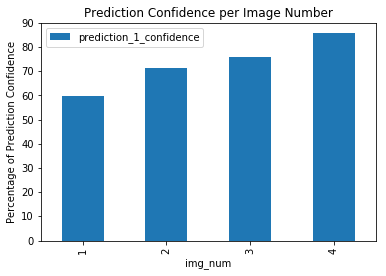

In [147]:
# Plot a Bar Chart for Prediction Confidence and Number of Images
d = prediction_confidence_av
d.plot(kind='bar', color=color_).set_title('Prediction Confidence per Image Number')
plt.xlabel=('Number of Images')
plt.ylabel('Percentage of Prediction Confidence');

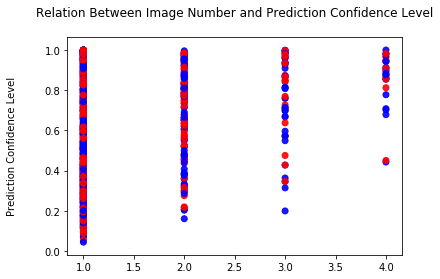

In [148]:
# Plot a correlation plot between Number of images and Prediction Confidence
x = combined_df['img_num']
y = combined_df['prediction_1_confidence']
plt.scatter(x, y, color=['r','b'], alpha=0.9)
plt.title('Relation Between Image Number and Prediction Confidence Level\n')
#plt.xlabel('Number of Images')
plt.ylabel('Prediction Confidence Level\n\n');

**Observation**
> There was no correlation between the image number and the prediction confidence.

### 2. Find out if there's any relation between dog_stages_type, favorite_count, and prediction_confidence.

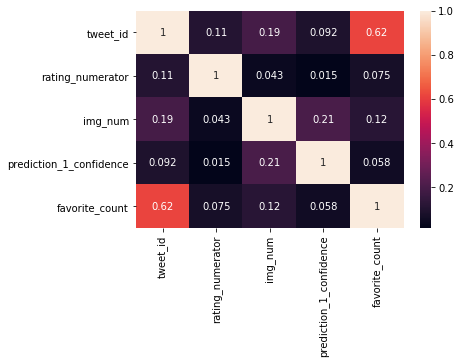

In [149]:
# Plotting a heatmap 
sb.heatmap(combined_df.corr(), annot=True);

**Observation**
> There's a week correlation amongst the variables. Prediction confidence and rating numerator had the weakest positive correlation among all the other features with a value of 0.015. 

In [218]:
# Favorite Count per Dog Stages
favorite_stages = pd.DataFrame(combined_df.groupby(['dog_stages_type'], as_index=False)['favorite_count'].mean())
favorite_stages

,dog_stages_type,favorite_count
0,doggo,19927.258621
1,floofer,13701.375000
2,missing,9288.481381
3,pupper,8309.453947
4,puppo,23585.000000


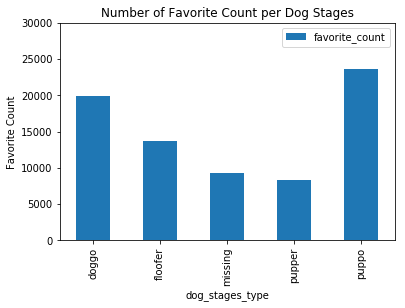

In [151]:
# Plot a Bar Chart for Prediction Confidence and Number of Images
dx = favorite_stages
dx.plot(kind='bar', color=color_).set_title('Number of Favorite Count per Dog Stages')
plt.xlabel=('Dog Stages')
plt.ylabel('Favorite Count')
plt.ylim(0, 30000);

**Observation**
> puppo had the highest favorite count then followed by Doggo.

### 3. Find out the dog stages with the highest number of prediction per confidence level.

In [152]:
# Dataframe with highest dog stages and prediction
highest_prediction = pd.DataFrame(combined_df.groupby(['dog_stages_type'])['prediction_1'].count())
highest_prediction

,prediction_1
dog_stages_type,
doggo,58
floofer,8
missing,1477
pupper,152
puppo,20


In [213]:
# Dataframe for dog stages and prediction confidence
highest_prediction_ = pd.DataFrame(combined_df.groupby(['dog_stages_type'])['prediction_1_confidence'].mean() * 100)
highest_prediction_

,prediction_1_confidence
dog_stages_type,
doggo,59.528143
floofer,57.739500
missing,61.436360
pupper,66.743922
puppo,68.900500


In [211]:
# Dataframe for dog stages, image and prediction confidence
stages_img_num = pd.DataFrame(combined_df.groupby(['dog_stages_type', 'img_num'])['prediction_1_confidence'].mean() * 100)
stages_img_num

prediction_1_confidence
dog_stages_type img_num                         
doggo           1                      57.047063
                2                      68.546810
                3                      57.122900
                4                      85.876400
floofer         1                      60.847143
                2                      35.986000
missing         1                      59.333783
                2                      70.629603
                3                      76.422327
                4                      84.567876
pupper          1                      63.611806
                2                      82.690419
                3                      71.599186
                4                      92.339875
puppo           1                      67.443254
                2                      67.002300
                3                      99.233900

In [205]:
# Select a color palette
colr = [sb.color_palette()[4] , sb.color_palette()[0], sb.color_palette()[7], sb.color_palette()[6]]


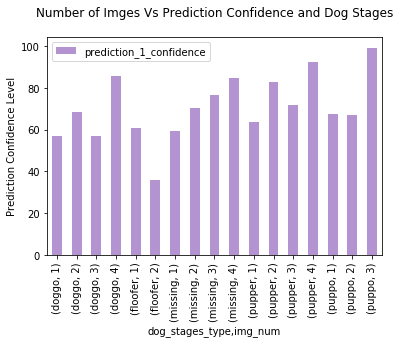

In [196]:
# Plot a Bar Chart for Prediction Confidence and Number of Images
dx1 = stages_img_num
dx1.plot(kind='bar', stacked=True, color=colr, alpha=0.7).set_title('Number of Imges Vs Prediction Confidence and Dog Stages\n')
plt.xlabel=('Dog Stages')
plt.ylabel('Prediction Confidence Level');
#plt.ylim(0, 30000);

**Observation**
> Puppo with three images had the highest number of prediction confidence.

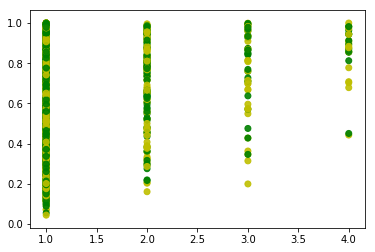

In [204]:
#import seaborn as sb
x = combined_df['img_num']
y = combined_df['prediction_1_confidence']
plt.scatter(x, y, color=['g','y'], alpha=0.9);

**Observation**
> There's no correlation between the image number and the prediction confidence.

### 4. Check which day, month or year had the highest tweets.

In [158]:
# Value counts for tweets
combined_df['timestamp'].value_counts()

2016-07-09 01:08:47    3
2017-01-07 16:59:28    3
2016-11-25 21:37:47    3
2016-07-31 16:50:42    3
2016-11-22 17:28:25    3
2016-05-19 01:38:16    3
2016-06-10 00:39:48    3
2017-04-17 16:34:26    3
2017-04-22 18:31:02    3
2016-12-12 00:29:28    3
2016-07-04 21:00:04    2
2017-05-22 00:28:40    2
2016-01-15 02:08:05    2
2016-12-25 21:00:18    2
2016-02-15 01:05:02    2
2016-07-02 19:01:20    2
2016-01-08 03:50:03    2
2015-12-06 00:17:55    2
2016-02-11 03:02:54    2
2016-06-18 18:26:18    2
2016-01-28 21:54:41    2
2016-11-29 16:33:36    2
2015-12-29 04:31:49    2
2016-01-09 21:58:42    2
2016-06-16 01:25:36    2
2016-02-16 03:25:58    2
2016-05-24 23:47:49    2
2016-01-18 02:49:58    2
2017-02-14 02:02:51    2
2016-12-21 01:44:13    2
                      ..
2016-01-03 04:01:13    1
2015-11-22 19:13:05    1
2016-01-13 03:12:26    1
2016-06-01 23:52:28    1
2016-01-02 01:33:43    1
2017-07-25 16:11:53    1
2015-11-18 03:18:55    1
2016-03-13 23:24:56    1
2016-10-21 18:16:44    1


**Observation**
> There are quite a number of days that had the highest number of tweets as indicated below:
* 2016-07-09 01:08:47    3
* 2017-01-07 16:59:28    3
* 2016-11-25 21:37:47    3
* 2016-07-31 16:50:42    3
* 2016-11-22 17:28:25    3
* 2016-05-19 01:38:16    3
* 2016-06-10 00:39:48    3
* 2017-04-17 16:34:26    3
* 2017-04-22 18:31:02    3
* 2016-12-12 00:29:28    3

### Previewing and Image of a Dog

In [159]:
# Libraries for loading image
from PIL import Image
import requests

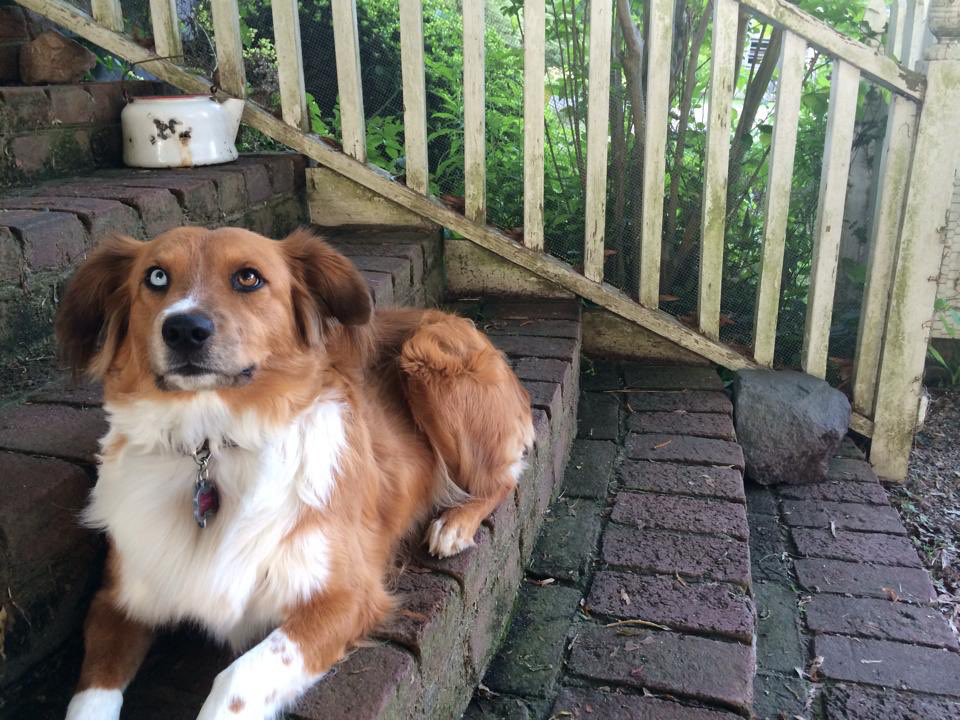

In [160]:
# View the first image
url = df_2_copy['jpg_url'][0] # 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'
first_image = Image.open(requests.get(url, stream=True).raw)
first_image

In [161]:
# Preview the dataframe
combined_df.head(2)

,tweet_id,timestamp,rating_numerator,dog_stages_type,jpg_url,img_num,prediction_1,prediction_1_confidence,favorite_count
0,892177421306343426,2017-08-01 00:17:27,13,missing,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,33819
1,891815181378084864,2017-07-31 00:18:03,12,missing,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,25461


In [162]:
# Import relevant libraries for plotting
import seaborn as sns
import matplotlib as plt

# Create a function that will plot a bar chart
def count_plot(df, column_name):
    ax = sns.countplot(x=column_name)
    ax.set_title(f"Number of Tweets Per Day by {df.columns[3].title().replace('_', ' ')}");
    #plt.show()
                 

#### 5. Which Dog Stage had the highest number of tweets per Day?

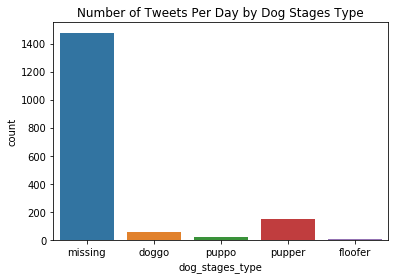

In [163]:
# Dog Stage with high number of tweets
data = combined_df.copy(deep=True)
count_plot(data, data['dog_stages_type'])

**Observation**
> Pupper Dog Stage had the highest number of tweets per day.

In [164]:
# Import necessary Libraries
import seaborn as sns
import matplotlib as plt

# Bar plot function
def count_plot_(df, column_name):
    ax = sns.countplot(x=column_name)
    ax.set_title(f"Number of Tweets Per Day by {df.columns[6].title().replace('_', ' ')}");
    #plt.show()
                 

In [165]:
# Preview the columns
combined_df.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'dog_stages_type',
       'jpg_url', 'img_num', 'prediction_1', 'prediction_1_confidence',
       'favorite_count'],
      dtype='object')

In [166]:
# Get predictions value count
dfc = pd.DataFrame(combined_df['prediction_1'].value_counts().head())
dfc

,prediction_1
golden retriever,175
labrador retriever,112
pembroke,101
chihuahua,86
pug,62


In [167]:
# Sum of predictions
dfc['prediction_1'].sum()

536

In [169]:
# create a new column for prediction proprtion
dfc['proportion'] = round(dfc['prediction_1']/dfc['prediction_1'].sum(), 3)*100
dfc

,prediction_1,proportion
golden retriever,175,32.6
labrador retriever,112,20.9
pembroke,101,18.8
chihuahua,86,16.0
pug,62,11.6


In [189]:
# set a color
cl = sb.color_palette()[0]

### 6. Which Dog had the Highest Number of Predictions?

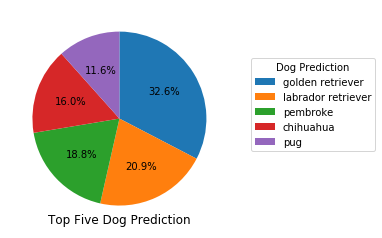

In [186]:
# Plot a pie chart using the proportion for dogs predictions
plt.axis('square') # Makes the pie chart fit properly i.e doesn't tilt
plt.pie(dfc['proportion'], startangle = 90, counterclock = False, autopct='%1.1f%%') # labels = dfc['proportion'].index
plt.legend(bbox_to_anchor=(1.7,0.8),loc="upper right",title ='Dog Prediction', labels = dfc['proportion'].index)
plt.title('Top Five Dog Prediction', y=-0.01); # Use theis to put the title at the bottom ,y=-0.1

In [373]:
# Favorite Count per Dog Stages
prediction_ = pd.DataFrame(combined_df.groupby(['prediction_1'], as_index=False)['favorite_count'].sum())
prediction_['favorite_count']
#count_plot_(data, dfc.index)

,prediction_1,favorite_count
0,afghan hound,51980
1,airedale,70484
2,american staffordshire terrier,122626
3,appenzeller,14635
4,australian terrier,22255
5,basenji,18839
6,basset,180258
7,beagle,88695
8,bedlington terrier,83227
9,bernese mountain dog,75094


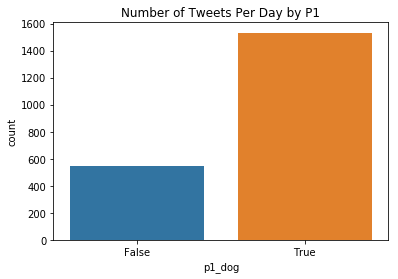

In [177]:
# Bar chart
count_plot(predictions_df, predictions_df['p1_dog'])

### Conclusions
> It was noted that Pupper had the highest number of tweets per day but had the lowest number (8000) of favorite counts while Puppo had the highest number of favorite counts but second lowest number of tweets per day. This is an indication that although had the highest number of tweets, it seemed not to be the favorite Dog stage and there's need to investigate as to why this is so. The investigation could entail considering other variables and building machine learning models that could help discover the insights thereof.